### Prevendo o espectro político das Zonas Eleitorais no Estado do Piauí

O dataset utilizado pode ser baixado no repositório deste [projeto](https://github.com/adautogaliza/espectro-politico-zonas-eleitorais).

### Explorando o dataset e aplicando primeiros tratamentos

In [55]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Importando dados

dados_bruto = pd.read_csv('dataset_eleitoral.csv', sep=';')

In [57]:
# Estrutura do dataset
dados_bruto.shape

(8908, 51)

In [58]:
# Tipagem dos dados

dados_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8908 non-null   int64  
 1   ZONA                           8908 non-null   int64  
 2   SEÇÃO                          8908 non-null   int64  
 3   CD_MUNICIPIO                   8908 non-null   int64  
 4   MUNICIPIO                      8908 non-null   object 
 5   ANO_ELEICAO                    8908 non-null   int64  
 6   UF                             8908 non-null   object 
 7   FEMININO                       8908 non-null   float64
 8   MASCULINO                      8908 non-null   float64
 9   GÊNERO NÃO INFORMADO           1 non-null      float64
 10  CASADO                         8907 non-null   float64
 11  DIVORCIADO                     8352 non-null   float64
 12  ESTADO CIVIL NÃO INFORMADO     4 non-null      f

In [59]:
# verificando features disponíveis

dados_bruto.columns

Index(['Unnamed: 0', 'ZONA', 'SEÇÃO', 'CD_MUNICIPIO', 'MUNICIPIO',
       'ANO_ELEICAO', 'UF', 'FEMININO', 'MASCULINO', 'GÊNERO NÃO INFORMADO',
       'CASADO', 'DIVORCIADO', 'ESTADO CIVIL NÃO INFORMADO',
       'SEPARADO JUDICIALMENTE', 'SOLTEIRO', 'VIÚVO', 'Idade 100 anos ou mais',
       'Idade 16 anos', 'Idade 17 anos', 'Idade 18 anos', 'Idade 19 anos',
       'Idade 20 anos', 'Idade 21 a 24 anos', 'Idade 25 a 29 anos',
       'Idade 30 a 34 anos', 'Idade 35 a 39 anos', 'Idade 40 a 44 anos',
       'Idade 45 a 49 anos', 'Idade 50 a 54 anos', 'Idade 55 a 59 anos',
       'Idade 60 a 64 anos', 'Idade 65 a 69 anos', 'Idade 70 a 74 anos',
       'Idade 75 a 79 anos', 'Idade 80 a 84 anos', 'Idade 85 a 89 anos',
       'Idade 90 a 94 anos', 'Idade 95 a 99 anos', 'Idade Inválido',
       'ANALFABETO', 'ENSINO FUNDAMENTAL COMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
       'ENSINO MÉDIO INCOMPLETO', 'LÊ E ESCREVE', 'NÃO INFORMADO',
       'SUPERIOR COMPLETO',

In [60]:
# Verificando a estrutura tabular

dados_bruto.head()

,Unnamed: 0,ZONA,SEÇÃO,CD_MUNICIPIO,MUNICIPIO,ANO_ELEICAO,UF,FEMININO,MASCULINO,GÊNERO NÃO INFORMADO,...,ENSINO FUNDAMENTAL INCOMPLETO,ENSINO MÉDIO COMPLETO,ENSINO MÉDIO INCOMPLETO,LÊ E ESCREVE,NÃO INFORMADO,SUPERIOR COMPLETO,SUPERIOR INCOMPLETO,TOTAL_ELEITORES,ESPECTRO POLITICO,TOTAL_VOTOS
0,0,1,57,12190,TERESINA,2022,PI,197.0,171.0,NaN,...,38.0,130.0,41.0,17.0,0.0,81.0,43.0,368.0,Direita,479
1,1,1,58,12190,TERESINA,2022,PI,222.0,147.0,NaN,...,41.0,135.0,40.0,22.0,0.0,67.0,42.0,369.0,Direita,464
2,2,1,59,12190,TERESINA,2022,PI,220.0,149.0,NaN,...,37.0,126.0,44.0,15.0,0.0,78.0,36.0,369.0,Centro-esquerda,421
3,3,1,60,12190,TERESINA,2022,PI,174.0,129.0,NaN,...,47.0,92.0,30.0,9.0,0.0,72.0,29.0,303.0,Direita,355
4,4,1,61,12190,TERESINA,2022,PI,178.0,128.0,NaN,...,41.0,92.0,36.0,12.0,0.0,67.0,29.0,306.0,Direita,374


As colunas ``genero e estado civil nao informadas`` serão retiradas porque são majoritariamente compostas de NaN's.

Demais colunas como Seção, CD_MUNICIPIO e etc. forma retiradas pois não agregaram valor para a previsão desejada.

In [61]:
# verificando Missing Data

dados_bruto.isnull().sum()

Unnamed: 0                          0
ZONA                                0
SEÇÃO                               0
CD_MUNICIPIO                        0
MUNICIPIO                           0
ANO_ELEICAO                         0
UF                                  0
FEMININO                            0
MASCULINO                           0
GÊNERO NÃO INFORMADO             8907
CASADO                              1
DIVORCIADO                        556
ESTADO CIVIL NÃO INFORMADO       8904
SEPARADO JUDICIALMENTE           2129
SOLTEIRO                            0
VIÚVO                             292
Idade 100 anos ou mais              0
Idade 16 anos                       0
Idade 17 anos                       0
Idade 18 anos                       0
Idade 19 anos                       0
Idade 20 anos                       0
Idade 21 a 24 anos                  0
Idade 25 a 29 anos                  0
Idade 30 a 34 anos                  0
Idade 35 a 39 anos                  0
Idade 40 a 4

In [62]:
# Removendo colunas desnecessárias

dados = dados_bruto.drop(['SEÇÃO','CD_MUNICIPIO','ANO_ELEICAO','UF','TOTAL_ELEITORES','TOTAL_VOTOS','GÊNERO NÃO INFORMADO','ESTADO CIVIL NÃO INFORMADO','Unnamed: 0'],axis=1)

Colunas que apresentam NaN's irão receber o valor 0 como substituto. Como tais colunas versam sobre a quantidade de eleitores com aquela característica, é razoável imputar 0 ao invés de valores como moda ou média, pois provavelmente trata-se de casos de ausência da informação dada pelo eleitor no cadastro eleitoral

In [63]:
dados.fillna(0, inplace=True)

In [64]:
# Mudando label do nosso target

dados['ESPECTRO POLITICO'] = dados['ESPECTRO POLITICO'].replace('Centro-esquerda',0)
dados['ESPECTRO POLITICO'] = dados['ESPECTRO POLITICO'].replace('Centro',1)
dados['ESPECTRO POLITICO'] = dados['ESPECTRO POLITICO'].replace('Direita',2)

In [65]:
# Definindo target e features
X = dados.drop(['ESPECTRO POLITICO'],axis=1)
y = dados['ESPECTRO POLITICO']

In [66]:
dados.head()

,ZONA,MUNICIPIO,FEMININO,MASCULINO,CASADO,DIVORCIADO,SEPARADO JUDICIALMENTE,SOLTEIRO,VIÚVO,Idade 100 anos ou mais,...,ANALFABETO,ENSINO FUNDAMENTAL COMPLETO,ENSINO FUNDAMENTAL INCOMPLETO,ENSINO MÉDIO COMPLETO,ENSINO MÉDIO INCOMPLETO,LÊ E ESCREVE,NÃO INFORMADO,SUPERIOR COMPLETO,SUPERIOR INCOMPLETO,ESPECTRO POLITICO
0,1,TERESINA,197.0,171.0,125.0,19.0,8.0,197.0,19.0,0.0,...,3.0,15.0,38.0,130.0,41.0,17.0,0.0,81.0,43.0,2
1,1,TERESINA,222.0,147.0,155.0,15.0,4.0,183.0,12.0,0.0,...,6.0,16.0,41.0,135.0,40.0,22.0,0.0,67.0,42.0,2
2,1,TERESINA,220.0,149.0,147.0,12.0,1.0,197.0,12.0,0.0,...,7.0,26.0,37.0,126.0,44.0,15.0,0.0,78.0,36.0,0
3,1,TERESINA,174.0,129.0,105.0,14.0,7.0,163.0,14.0,0.0,...,2.0,22.0,47.0,92.0,30.0,9.0,0.0,72.0,29.0,2
4,1,TERESINA,178.0,128.0,120.0,17.0,1.0,153.0,15.0,0.0,...,6.0,23.0,41.0,92.0,36.0,12.0,0.0,67.0,29.0,2


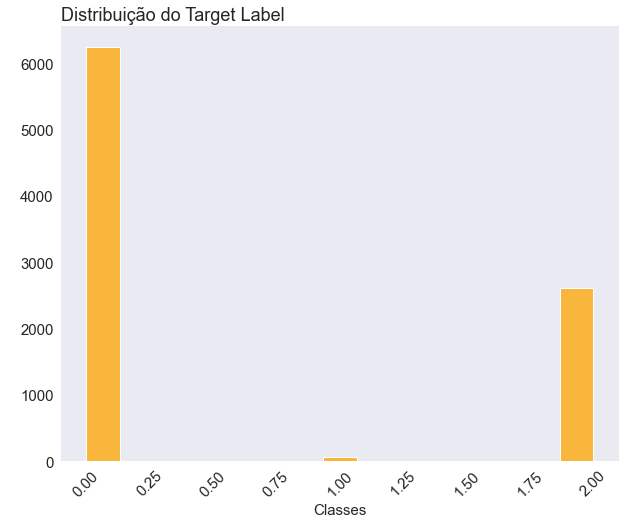

In [67]:
# Verificando balanceamento do nosso target label

g1 = sns.histplot(x="ESPECTRO POLITICO", color="Orange", data=dados)
g1.figure.set_size_inches(10,8)
plt.title('Distribuição do Target Label', fontsize = 18, loc='left')
plt.ylabel(' ')
plt.xlabel('Classes', fontsize=15)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
sns.despine (left = True)
sns.set_style('dark')

### Pré-Processamento dos dados e Treinamento dos Modelos:

1. Separar os dados em treino e teste pelo método StraitifiedKfold(). Nosso target possui desbalanceamento de classes.

2. Usaremos o método de Pipelines para organizar o código em poucas linhas. Este método é recomendado quando precisamos fazer pre-processamento em datasets que tenham features numéricas e categóricas e também para evitar problemas de data leakeage.

3. Criaremos três modelos concorrentes: RandomForestClassifier, Naives Bayes e KNN. O objetivo é encontrar o modelo com melhor desempenho primordialmente pelo ``f1score``

In [68]:
# Aplicando split (valerá para todos os modelos)
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, accuracy_score

separador = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

for treino_index, val_index in separador.split(X, y):
  X_treino, X_teste = X.iloc[treino_index, :], X.iloc[val_index, :]
  y_treino, y_teste = y.iloc[treino_index], y.iloc[val_index]

### 1º Modelo: Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Lista de features categoricas
cols_categorica = [coluna for coluna in X_treino.columns if X_treino[coluna].dtype == "object"]

# Lista de features numéricas
cols_numerica = [coluna for coluna in X_treino.columns if X_treino[coluna].dtype in ['int64', 'float64']]

# Instanciando transformador numérico: tratamento de NaN's ja realizado, mas instacioamos aqui a normalização dos dados também
transformador_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', Normalizer())
])

# Instanciando transformador categorico
transformador_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Definindo as transformações a serem realizadas
processador = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, cols_numerica),
        ('cat', transformador_categorico, cols_categorica)
    ])

# Selecionando o 1º modelo de Classificação
modelo = RandomForestClassifier(random_state=0)

# Criando pipeline (transformadores + modelo)
pipeline = Pipeline(steps=[('preprocessor', processador),
                              ('model', modelo)
                             ])

In [70]:
# Loop para rodar 10 execuções em cada folder criado no split (n_fold = 4)
execucoes = 10
lista_acuracias = []
lista_f1_scores = []

for train_index, val_index in separador.split(X, y):
    X_treino, X_teste = X.iloc[train_index, :], X.iloc[val_index, :]
    y_treino, y_teste = y.iloc[train_index], y.iloc[val_index]
    for run in range(execucoes):
            
      # Treinando o modelo usando o pipeline configurado previamente
      pipeline.fit(X_treino, y_treino)
      previsao = pipeline.predict(X_teste)
      
      # Calculando métricas para cada rodada
      acc = accuracy_score(y_teste, previsao)
      lista_acuracias.append(acc)

      _f1_score = f1_score(y_teste, previsao, average='weighted')
      lista_f1_scores.append(_f1_score)
print("Treinamento Concluído")

Treinamento Concluído


Desempenho do Modelo:

In [71]:
# Calculando média e desvio padrão de acurácia das execuções
acc, acc_std = np.array(lista_acuracias).mean(), \
  np.array(lista_acuracias).std()
print(f'A acurácia média entre as execuções foi de {round(acc*100,2)}% com desvio padrão de {acc_std}')

#Calculando média e desvio padrão de f1score das execuções
f1, f1_std = np.array(lista_f1_scores).mean(),\
 np.array(lista_f1_scores).std()
print(f'O F1score médio entre as execuções foi de {round(f1*100,2)}% com desvio padrão de {f1_std}')

A acurácia média entre as execuções foi de 83.85% com desvio padrão de 0.004415348100425961
O F1score médio entre as execuções foi de 82.52% com desvio padrão de 0.00580688878824256


C:\Users\Adauto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


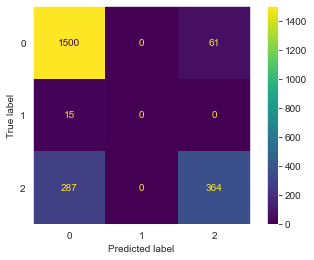

In [72]:
# Plotagem da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_teste, y_teste)

### 2º Modelo: KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Lista de features categoricas
cols_categorica = [coluna for coluna in X_treino.columns if X_treino[coluna].dtype == "object"]

# Lista de features numéricas
cols_numerica = [coluna for coluna in X_treino.columns if X_treino[coluna].dtype in ['int64', 'float64']]

# Instanciando transformador numérico: tratamento de NaN's ja realizado, mas instacioamos aqui a normalização dos dados também
transformador_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', Normalizer())
])

# Instanciando transformador categorico
transformador_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Definindo as transformações a serem realizadas
processador = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, cols_numerica),
        ('cat', transformador_categorico, cols_categorica)
    ])

# Selecionando o 2º modelo de Classificação
modelo = KNeighborsClassifier(n_neighbors=5)

# Criando pipeline (transformadores + modelo)
pipeline = Pipeline(steps=[('preprocessor', processador),
                              ('model', modelo)
                             ])

In [74]:
# Loop para rodar 10 execuções em cada folder criado no split (n_fold = 4)
execucoes = 10
lista_acuracias = []
lista_f1_scores = []

for train_index, val_index in separador.split(X, y):
    X_treino, X_teste = X.iloc[train_index, :], X.iloc[val_index, :]
    y_treino, y_teste = y.iloc[train_index], y.iloc[val_index]
    for run in range(execucoes):
            
      # Treinando o modelo usando o pipeline configurado previamente
      pipeline.fit(X_treino, y_treino)
      previsao = pipeline.predict(X_teste)
      
      # Calculando métricas para cada rodada
      acc = accuracy_score(y_teste, previsao)
      lista_acuracias.append(acc)

      _f1_score = f1_score(y_teste, previsao, average='weighted')
      lista_f1_scores.append(_f1_score)
print("Treinamento Concluído")

Treinamento Concluído


Desempenho do Modelo:

In [75]:
# Calculando média e desvio padrão de acurácia das execuções
acc, acc_std = np.array(lista_acuracias).mean(), \
  np.array(lista_acuracias).std()
print(f'A acurácia média entre as execuções foi de {round(acc*100,2)}% com desvio padrão de {acc_std}')

#Calculando média e desvio padrão de f1score das execuções
f1, f1_std = np.array(lista_f1_scores).mean(),\
 np.array(lista_f1_scores).std()
print(f'O F1score médio entre as execuções foi de {round(f1*100,2)}% com desvio padrão de {f1_std}')

A acurácia média entre as execuções foi de 86.43% com desvio padrão de 0.004516928499939541
O F1score médio entre as execuções foi de 86.2% com desvio padrão de 0.004335826755303525


C:\Users\Adauto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


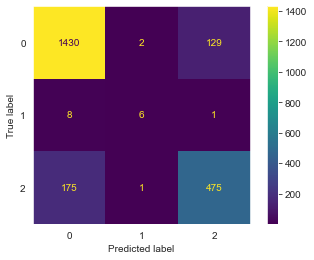

In [76]:
# Plotagem da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_teste, y_teste)

### 3º Modelo: Regressão Logística

In [77]:
from sklearn.linear_model import LogisticRegression

# Lista de features categoricas
cols_categorica = [coluna for coluna in X_treino.columns if X_treino[coluna].dtype == "object"]

# Lista de features numéricas
cols_numerica = [coluna for coluna in X_treino.columns if X_treino[coluna].dtype in ['int64', 'float64']]

# Instanciando transformador numérico: tratamento de NaN's ja realizado, mas instacioamos aqui a normalização dos dados também
transformador_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', Normalizer())
])

# Instanciando transformador categorico
transformador_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Definindo as transformações a serem realizadas
processador = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, cols_numerica),
        ('cat', transformador_categorico, cols_categorica)
    ])

# Selecionando o 3º modelo de Classificação
modelo = LogisticRegression(random_state=0,max_iter=500)

# Criando pipeline (transformadores + modelo)
pipeline = Pipeline(steps=[('preprocessor', processador),
                              ('model', modelo)
                             ])

In [78]:
# Loop para rodar 10 execuções em cada folder criado no split (n_fold = 4)
execucoes = 10
lista_acuracias = []
lista_f1_scores = []

for train_index, val_index in separador.split(X, y):
    X_treino, X_teste = X.iloc[train_index, :], X.iloc[val_index, :]
    y_treino, y_teste = y.iloc[train_index], y.iloc[val_index]
    for run in range(execucoes):
            
      # Treinando o modelo usando o pipeline configurado previamente
      pipeline.fit(X_treino, y_treino)
      previsao = pipeline.predict(X_teste)
      
      # Calculando métricas para cada rodada
      acc = accuracy_score(y_teste, previsao)
      lista_acuracias.append(acc)

      _f1_score = f1_score(y_teste, previsao, average='weighted')
      lista_f1_scores.append(_f1_score)
print("Treinamento Concluído")

Treinamento Concluído


Desempenho do Modelo:

In [79]:
# Calculando média e desvio padrão de acurácia das execuções
acc, acc_std = np.array(lista_acuracias).mean(), \
  np.array(lista_acuracias).std()
print(f'A acurácia média entre as execuções foi de {round(acc*100,2)}% com desvio padrão de {acc_std}')

#Calculando média e desvio padrão de f1score das execuções
f1, f1_std = np.array(lista_f1_scores).mean(),\
 np.array(lista_f1_scores).std()
print(f'O F1score médio entre as execuções foi de {round(f1*100,2)}% com desvio padrão de {f1_std}')

A acurácia média entre as execuções foi de 87.09% com desvio padrão de 0.003627187791064997
O F1score médio entre as execuções foi de 86.7% com desvio padrão de 0.003276193216892493


C:\Users\Adauto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


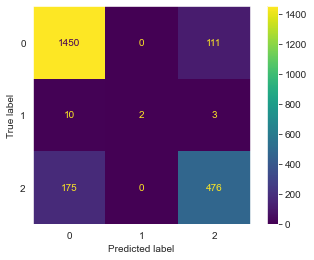

In [80]:
# Plotagem da matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_teste, y_teste)

### Conslusões:

1. O modelo que melhor desempenha pelo F1score é o de Regressão logística com 86,%, seguido pelo KNN (86,2%) e por último o RandomForest com 82.52%.

2. Normalizar os dados ao invés de padronizá-los geram melhores resultados entre os modelos concorrentes. Este teste foi empírico por tentativa e erro e decidimos reportar neste relatório apenas os melhores resultados.